In [1]:
import pandas as pd
import numpy as np

In [2]:
# pandas를 통해 csv파일 읽어오기
data = pd.read_csv('seeds.csv',encoding='cp949')
data.head()

,area,perimeter,compactness,len_ker,wid_ker,a_coef,len_ker_gro,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### EDA
- Exploratory Data Analysus
- 데이터셋의 특징간 관계를 시각화 하기 위해 탐색적 데이터 분석을 실시
- 이상치 감지, 분포 시각화, 특성 사이 관계 파악


In [3]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

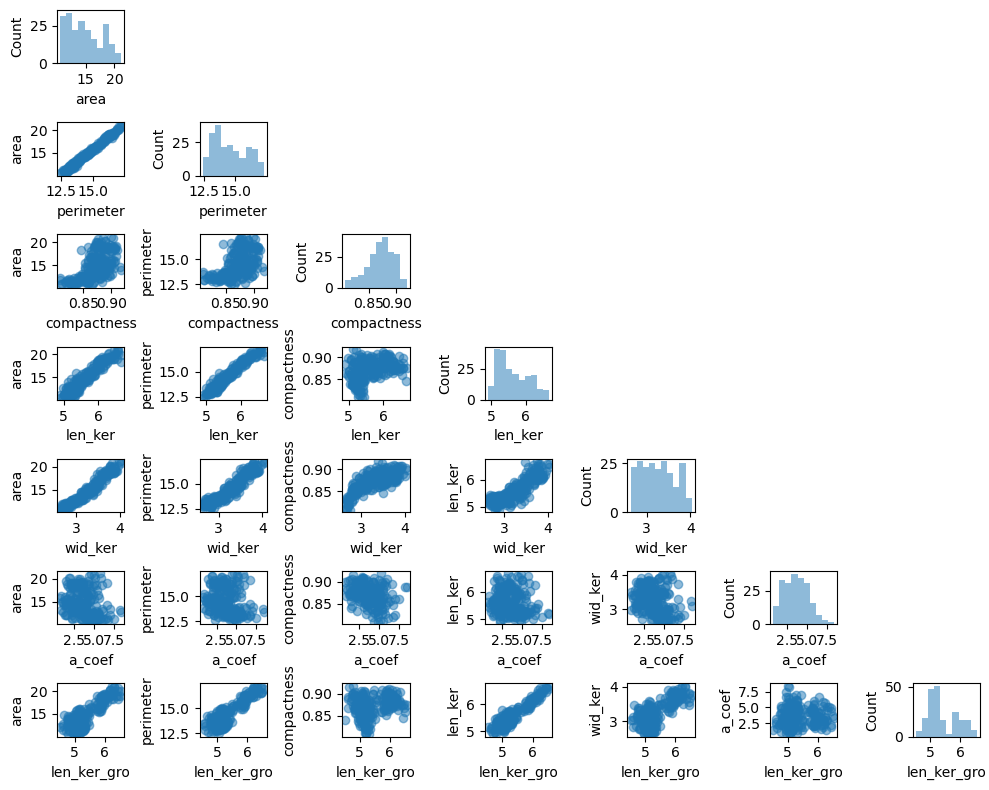

In [4]:
cols = ['area', 'perimeter', 'compactness', 'len_ker', 'wid_ker', 'a_coef', 'len_ker_gro']
scatterplotmatrix(data[cols].values, figsize=(10, 8), names = cols, alpha = 0.5)
plt.tight_layout()
plt.show()

In [5]:
X = data.iloc[:,:7]
X.head()

,area,perimeter,compactness,len_ker,wid_ker,a_coef,len_ker_gro
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [6]:
Y = data.iloc[:,-1]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

### PCA
- Principal Component Analysis
- dimenstion reduction
- 정보의 손실을 최대한 줄이면서 차원을 축소

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# pca 수행에 앞서 데이터 정규화를 수행한다.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#7개의 피처를 갖는 데이터를 2개의 피처를 갖는 데이터로 차원을 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

pca_columns = ['Principal Component 1', 'Principal Component 2']
data_pca = pd.DataFrame(X_pca, columns = pca_columns)
data_pca['label'] = Y
data_pca.head()

,Principal Component 1,Principal Component 2,label
0,0.317047,0.783669,1
1,-0.003386,1.913214,1
2,-0.459443,1.907225,1
3,-0.591936,1.931069,1
4,1.102910,2.068090,1


In [8]:
print('explained varince ration :', pca.explained_variance_ratio_)

explained varince ration : [0.71874303 0.17108184]


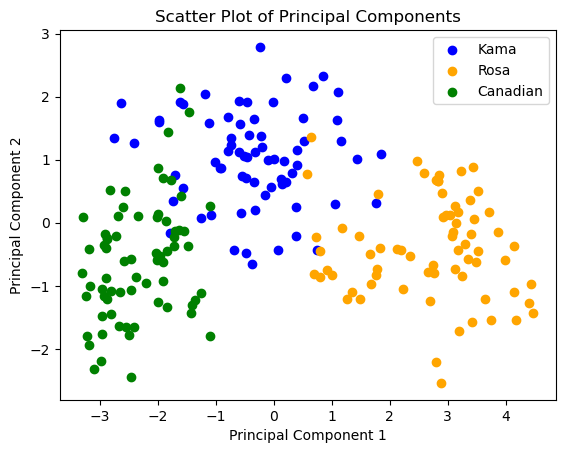

In [9]:
Kama = data_pca[data_pca['label'] == 1]
Kama_x = Kama.iloc[:,0]
Kama_y = Kama.iloc[:,1]

Rosa = data_pca[data_pca['label'] == 2]
Rosa_x = Rosa.iloc[:,0]
Rosa_y = Rosa.iloc[:,1]

Canadian = data_pca[data_pca['label'] == 3]
Canadian_x = Canadian.iloc[:,0]
Canadian_y = Canadian.iloc[:,1]

plt.scatter(Kama_x, Kama_y, color = 'blue', label = 'Kama')
plt.scatter(Rosa_x, Rosa_y, color = 'orange', label = 'Rosa')
plt.scatter(Canadian_x, Canadian_y, color= 'green', label = 'Canadian')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.legend()
plt.show()

### K-Means Clustering
+ Clustering : Unsupervised learning
+ 1. 랜덤하게 K개의 샘플을 선택 [선택된 K개는 각 클러스터의 중심 : Centeroid]
2. 나머지 샘플들이 어떤 클러스터에 속하는지 판단해준다. 
    
    [샘플은 가장 가까운 Centeroid의 클러스터에 속해진다.]
    
3. Centeroid를 클러스터의 평균값으로 만들어 준다. [Centeroid 업데이트]

In [10]:
from sklearn.cluster import KMeans
# cluster의 수 = 3, 초기 centroid 설정 방식, 최대 반복 회수, 수행 결과 고정을 위한 random state
# k-means++ : 초기 centroid가 서로 멀리 떨어지도록 선정
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(data_pca.iloc[:,:2])

# k-means clustering의 결과를 출력 
# 예상되는 출력 : 3개의 클래스로 구분
print(kmeans.labels_)

C:\Users\YunJae\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YunJae\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0]


In [11]:
data_pca['cluster']=kmeans.labels_
cluster_result = data_pca.groupby(['label','cluster'])['Principal Component 1'].count()
print(cluster_result)

label  cluster
1      0           8
       1           2
       2          60
2      1          65
       2           5
3      0          66
       2           4
Name: Principal Component 1, dtype: int64


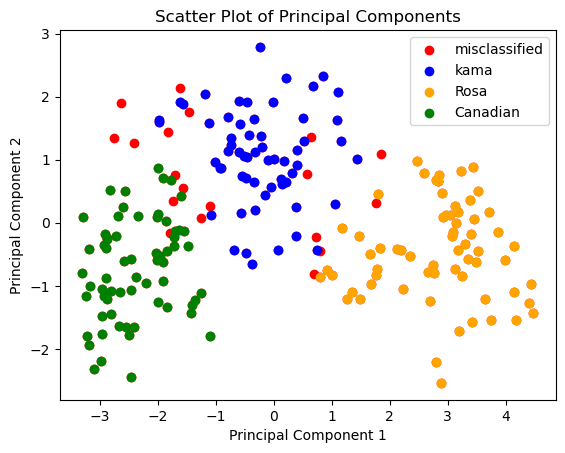

In [12]:
# 1번 label을 갖는 데이터는 2번 클러스터
# 2번 label을 갖는 데이터는 1번 클러스터
# 3번 label을 갖는 데이터는 0번 클러스터를 갖는다.
# 잘못 분류된 데이터의 경우 빨간색으로 표시

Kama = data_pca[(data_pca['cluster'] == 2) & (data_pca['label'] == 1)]
Kama_x = Kama.iloc[:,0]
Kama_y = Kama.iloc[:,1]

Rosa = data_pca[(data_pca['cluster'] == 1) & (data_pca['label'] == 2)]
Rosa_x = Rosa.iloc[:,0]
Rosa_y = Rosa.iloc[:,1]

Canadian = data_pca[(data_pca['cluster'] == 0) & (data_pca['label'] == 3)]
Canadian_x = Canadian.iloc[:,0]
Canadian_y = Canadian.iloc[:,1]

plt.scatter(data_pca.iloc[:,0], data_pca.iloc[:,1], color = 'red', label = 'misclassified')
plt.scatter(Kama_x, Kama_y, color = 'blue', label = 'kama')
plt.scatter(Rosa_x, Rosa_y, color = 'orange', label = 'Rosa')
plt.scatter(Canadian_x, Canadian_y, color= 'green', label  = 'Canadian')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.legend()
plt.show()

### Ridge classifier
+ C = RSS + λ ΣW²
+ weight에 대한 규제가 추가됨 (L2 norm)
+ λ 값이 커질 수록 weight에 대한 규제가 강해짐 -> 0에 가까운 파라미터를 얻게된다.


In [13]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = X_std
y = Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 규제가 없는 경우
classifier = RidgeClassifier(alpha = 0.0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#모델의 계수를 출력
print(classifier.coef_)

Accuracy: 0.9682539682539683
[[-5.28786187  4.25643891  0.94033626  1.73645983 -0.09127986 -0.16469004
  -1.43400299]
 [ 1.40751464  0.17021159 -0.23482471 -1.31895665 -0.06721874  0.02639446
   0.78766892]
 [ 3.88034723 -4.42665051 -0.70551156 -0.41750318  0.15849859  0.13829558
   0.64633407]]


In [14]:
# 규제가 있는 경우
classifier = RidgeClassifier(alpha = 3.0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classifier.coef_)

Accuracy: 0.9682539682539683
[[-0.26826643  0.23789581  0.25928959  0.96906145 -0.14619464 -0.24855671
  -1.25646313]
 [ 0.33012236  0.24427712 -0.08542861 -0.5214007   0.21253725  0.04725964
   0.65812072]
 [-0.06185593 -0.48217293 -0.17386098 -0.44766075 -0.06634261  0.20129707
   0.59834241]]
